In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
heart_df = pd.read_csv('C:/Users/Binh Bui/Downloads/Compressed/archive/heart_2020_cleaned.csv')
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [2]:
def detect_outliers(df, attribute):
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[attribute] < lower_bound) | (df[attribute] > upper_bound)]
    return ls

In [3]:
list_index = []
list_index.extend(detect_outliers(heart_df, 'BMI'))
heart_df = heart_df.drop(list_index)
heart_df.shape

(309399, 18)

In [4]:
list_index = []
list_index.extend(detect_outliers(heart_df, 'SleepTime'))
heart_df = heart_df.drop(list_index)
heart_df.shape

(305113, 18)

In [5]:
X = heart_df.drop('HeartDisease', axis=1).copy()
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
y = heart_df['HeartDisease'].copy()
y.head()

0    No
1    No
2    No
3    No
4    No
Name: HeartDisease, dtype: object

In [7]:
X['Diabetic'] = X['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})
X['Diabetic'].value_counts()

No     265995
Yes     39118
Name: Diabetic, dtype: int64

In [8]:
unique_df = pd.DataFrame(X.nunique(), columns=['no_of_unique']).reset_index()
yn_array = unique_df.loc[unique_df['no_of_unique']==2]['index'].to_numpy()
yn_array = np.delete(yn_array, np.argwhere(yn_array=='Sex'))
yn_array

array(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype=object)

In [9]:
my_dict = {'No': 0, 'Yes': 1}
for x in yn_array:
    X[x] = X[x].map(my_dict)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [10]:
X['Sex'] = X['Sex'].map({'Male': 0, 'Female': 1})
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,1,1,Very good,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,0,1,Very good,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,0,65-69,White,1,1,Fair,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,1,75-79,White,0,0,Good,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,1,40-44,White,0,1,Very good,8.0,0,0,0


In [11]:
X['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent']])
X['GenHealth'] = ordinal_encoder.fit_transform(X[['GenHealth']])
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,1,1,3.0,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,0,1,3.0,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,0,65-69,White,1,1,1.0,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,1,75-79,White,0,0,2.0,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,1,40-44,White,0,1,3.0,8.0,0,0,0


In [13]:
np.sort(X['AgeCategory'].unique())

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype=object)

In [14]:
age_encoder = OrdinalEncoder(categories=[['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']])
X['AgeCategory'] = age_encoder.fit_transform(X[['AgeCategory']])

In [15]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,1,7.0,White,1,1,3.0,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,1,12.0,White,0,1,3.0,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,0,9.0,White,1,1,1.0,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,1,11.0,White,0,0,2.0,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,1,4.0,White,0,1,3.0,8.0,0,0,0


In [16]:
from sklearn.preprocessing import OneHotEncoder
race_encoder = OneHotEncoder(sparse=False)
race_array = race_encoder.fit_transform(X[['Race']])
race_array

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [17]:
race_df = pd.DataFrame(race_array, columns=race_encoder.get_feature_names_out(), index=X[['Race']].index)

In [18]:
X = pd.concat([X, race_df], axis=1).drop('Race', axis=1)

In [19]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,16.60,1,0,0,3.0,30.0,0,1,7.0,1,...,5.0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,20.34,0,0,1,0.0,0.0,0,1,12.0,0,...,7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,26.58,1,0,0,20.0,30.0,0,0,9.0,1,...,8.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.21,0,0,0,0.0,0.0,0,1,11.0,0,...,6.0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,23.71,0,0,0,28.0,0.0,1,1,4.0,0,...,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

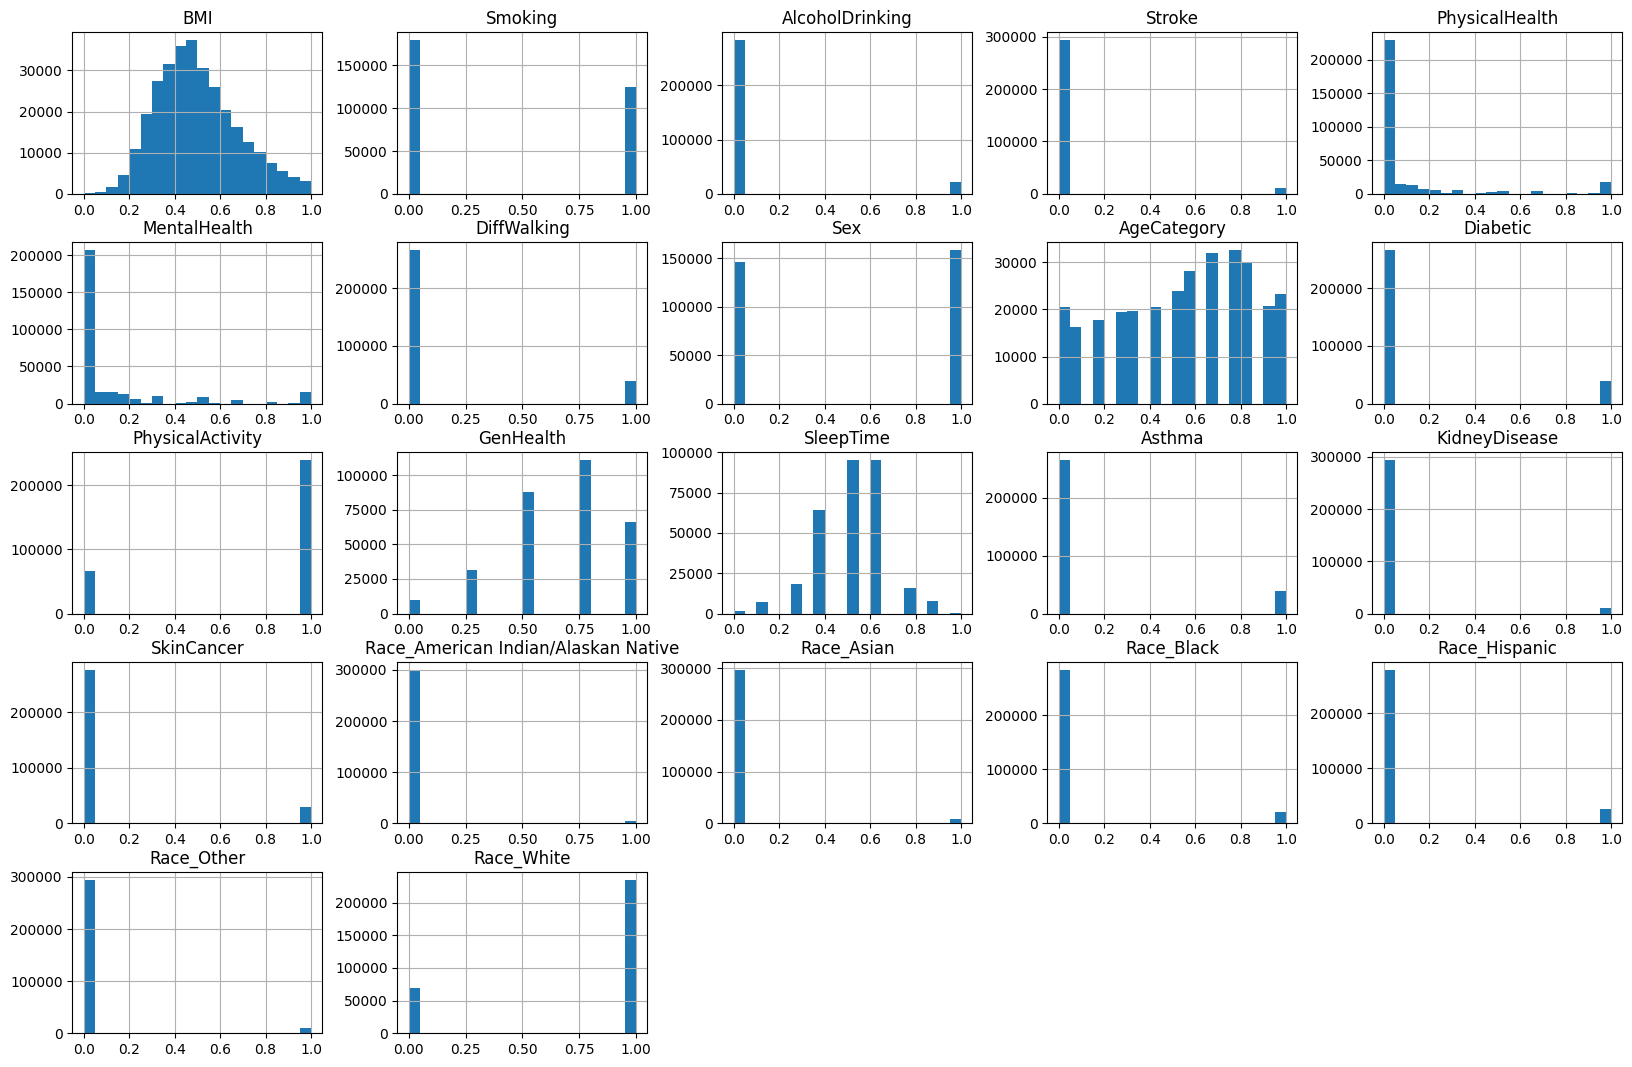

In [21]:
X_scaled.hist(bins=20, figsize=(20,13))
plt.show()

In [22]:
X_scaled

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.122926,1.0,0.0,0.0,0.100000,1.0,0.0,1.0,0.583333,1.0,...,0.250,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.249577,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.000000,0.0,...,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.460887,1.0,0.0,0.0,0.666667,1.0,0.0,0.0,0.750000,1.0,...,0.625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.380630,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.916667,0.0,...,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.363698,0.0,0.0,0.0,0.933333,0.0,1.0,1.0,0.333333,0.0,...,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305108,0.352523,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.666667,0.0,...,0.375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
305109,0.313241,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
305110,0.488994,1.0,0.0,0.0,0.233333,0.0,1.0,0.0,0.666667,1.0,...,0.375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
305111,0.571283,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,...,0.250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
type(y)

pandas.core.series.Series

In [24]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_miss, y_miss = nr.fit_resample(X, y.ravel())

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, test_size=0.2, random_state=42, stratify=y_miss)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model2 = RandomForestClassifier(random_state=42, n_estimators=200)

In [28]:
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [29]:
from sklearn.metrics import f1_score
y_pred_simple = model2.predict(X_miss)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model2, X_train, y_train, cv=5)
f1_score(y_train, y_pred, pos_label='Yes')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_pred, pos_label='Yes'))
print(recall_score(y_train, y_pred, pos_label='Yes'))

In [ ]:
print(y_test[500])
print(model2.predict(X_test)[500])